In [1]:
# Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom
#import finance_utils as fu
#import ystockquote as ysq
#import technical_indicators as ti
import stock_db_mgr as sdm

In [14]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [15, 6]

# Set seaborn plot theme:
sns.set_theme()

In [28]:
db = sdm.StockDBMgr('stock_db/test', '2010-01-01')

In [29]:
df = db.get_all_symbol_single_data_item('Close')

In [30]:
df.head()

Close,AAPL,GLD,GOOG,IBM,SPY
Date,,,,,
2010-01-04,6.526021,109.800003,15.610239,82.284225,88.860374
2010-01-05,6.537304,109.699997,15.541497,81.290237,89.095596
2010-01-06,6.433318,111.510002,15.149715,80.762169,89.158348
2010-01-07,6.421425,110.820000,14.797037,80.482605,89.534706
2010-01-08,6.464116,111.370003,14.994298,81.290237,89.832642


array([[<AxesSubplot:title={'center':'SPY'}>,
        <AxesSubplot:title={'center':'AAPL'}>]], dtype=object)

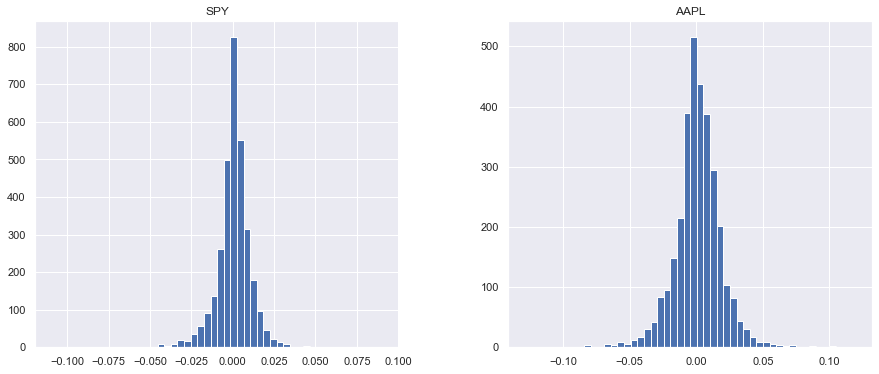

In [40]:
df.pct_change().loc[:, ['SPY', 'AAPL']].hist(bins=50)

In [37]:
df.pct_change().describe()

Close,AAPL,GLD,GOOG,IBM,SPY
count,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000
mean,0.001111,0.000152,0.000709,0.000218,0.000494
std,0.017936,0.009870,0.016808,0.014178,0.011022
min,-0.128647,-0.087808,-0.111008,-0.128507,-0.109424
25%,-0.007435,-0.004877,-0.006802,-0.006254,-0.003705
50%,0.000923,0.000421,0.000674,0.000397,0.000664
75%,0.010644,0.005363,0.008857,0.007005,0.005634
max,0.119808,0.049038,0.160524,0.113011,0.090603


In [36]:
df.pct_change().skew()

Close
AAPL   -0.108051
GLD    -0.461223
GOOG    0.513659
IBM    -0.503466
SPY    -0.575276
dtype: float64

In [43]:
df.pct_change().kurtosis()

Close
AAPL     5.180959
GLD      4.795717
GOOG     9.260209
IBM      9.678603
SPY     11.139896
dtype: float64